In [1]:
%matplotlib inline

# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import csv

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import ticker

import matplotlib.cm as cm

from cycler import cycler

#------------------------------------------------------------------------------------------------------------
# define plot properties

from matplotlib import rcParams
from matplotlib import rc
from matplotlib.colors import hsv_to_rgb
from mpl_toolkits.axes_grid1 import make_axes_locatable

def rgb(r,g,b):
    return (float(r)/256.,float(g)/256.,float(b)/256.)

cb2 = [rgb(255,127,0), rgb(31,120,180), rgb(51,160,44), rgb(227,26,28), \
       rgb(166,206,227), rgb(253,191,111), rgb(178,223,138), rgb(251,154,153)]

rcParams['figure.figsize'] = (12,12)
rcParams['figure.dpi'] = 250

rcParams['lines.linewidth'] = 1

rcParams['axes.prop_cycle'] = cycler('color', cb2)
rcParams['axes.facecolor'] = 'white'
rcParams['axes.grid'] = False

rcParams['patch.facecolor'] = cb2[0]
rcParams['patch.edgecolor'] = 'white'

rcParams['font.size'] = 10
rcParams['font.weight'] = 10

In [2]:
# path of files
path_n = "results_n.csv"
path_m = "results_m.csv"

# figure properties

hue_order_box = ["Goemans-Williamson", "QAOA", "MAQAOA", "XQAOA (X=Y Mixer)"]
hue_order_line = ["Gurobi", "Greedy", "Karmarkar-Karp"]
palette = sns.color_palette("hls", 8)
palette_box = [palette[0],palette[1],palette[2],palette[3]]
palette_line = [palette[4],palette[5],palette[6]]
flierprops = dict(marker="x", markeredgecolor = '#3a506b', alpha=0.5)

In [8]:
def plot_data(csv_path):

    df = pd.read_csv(csv_path)
    if csv_path == "results_n.csv":
        ivar = 'm'
    else:
        ivar = 'n'

    alg = df['Algorithm']
    boxplots = (alg == "Goemans-Williamson") | (alg == "QAOA") | (alg == "MAQAOA") | (alg == "XQAOA (X=Y Mixer)")
    lineplots = (alg == "Gurobi") | (alg == "Greedy") | (alg == "Karmarkar-Karp") 

    fig = plt.figure(figsize=(12,12), dpi=500)
    ax1 = fig.add_subplot(111)

    sns.boxplot(data=df, 
                     x=df[ivar][boxplots], 
                     y='Cost', 
                     hue=df['Algorithm'][boxplots],
                     hue_order=hue_order_box, 
                     palette=palette_box,
                     flierprops=flierprops)

    sns.lineplot(data=df,
                      x=df[ivar][lineplots]-2,
                      y='Cost',
                      hue=df['Algorithm'][lineplots],
                      hue_order=hue_order_line,
                      ci=None,
                      palette=palette_line,
                      estimator=np.median)

    ax2 = ax1.twiny()
    ax2.set_xlim(ax1.get_xlim())

    fig.subplots_adjust(bottom=0.35)
    ax1.set_xlabel(r"$m$")
    ax2.set_xlabel(r"$m/n$")
    # Move twinned axis ticks and label from top to bottom
    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")
    # Offset the twin axis below the host
    ax2.spines["bottom"].set_position(("axes", -0.114))
    # Turn on the frame for the twin axis, but then hide all 
    # but the bottom spine
    ax2.set_frame_on(True)
    ax2.patch.set_visible(False)

    for sp in ax2.spines.values():
        sp.set_visible(False)
    ax2.spines["bottom"].set_visible(True)

    ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax2.xaxis.set_major_formatter(lambda x, pos: str((x+2)/10))

    # title
    plt.title(f'Cost of Number Partitioning Problems ($n=10$)', fontsize = 15, y=1.0, pad=-20)

    # legend
    sns.move_legend(ax1, "lower center",
        bbox_to_anchor=(.5,-0.3), ncol=4, title=None, frameon=True)

    plt.yscale('symlog')
    plt.ylabel('Cost',fontsize = 12)
    
    if csv_path == path_n:
        ax1.set(ylim=(0,0.5*10**7))
    else:
        ax1.set(ylim=(0,0.5*10**4))

    sns.despine(ax=ax1,offset=10, trim=True)

    #plt.savefig('../report/figures/fixed_n.png', bbox_inches='tight')

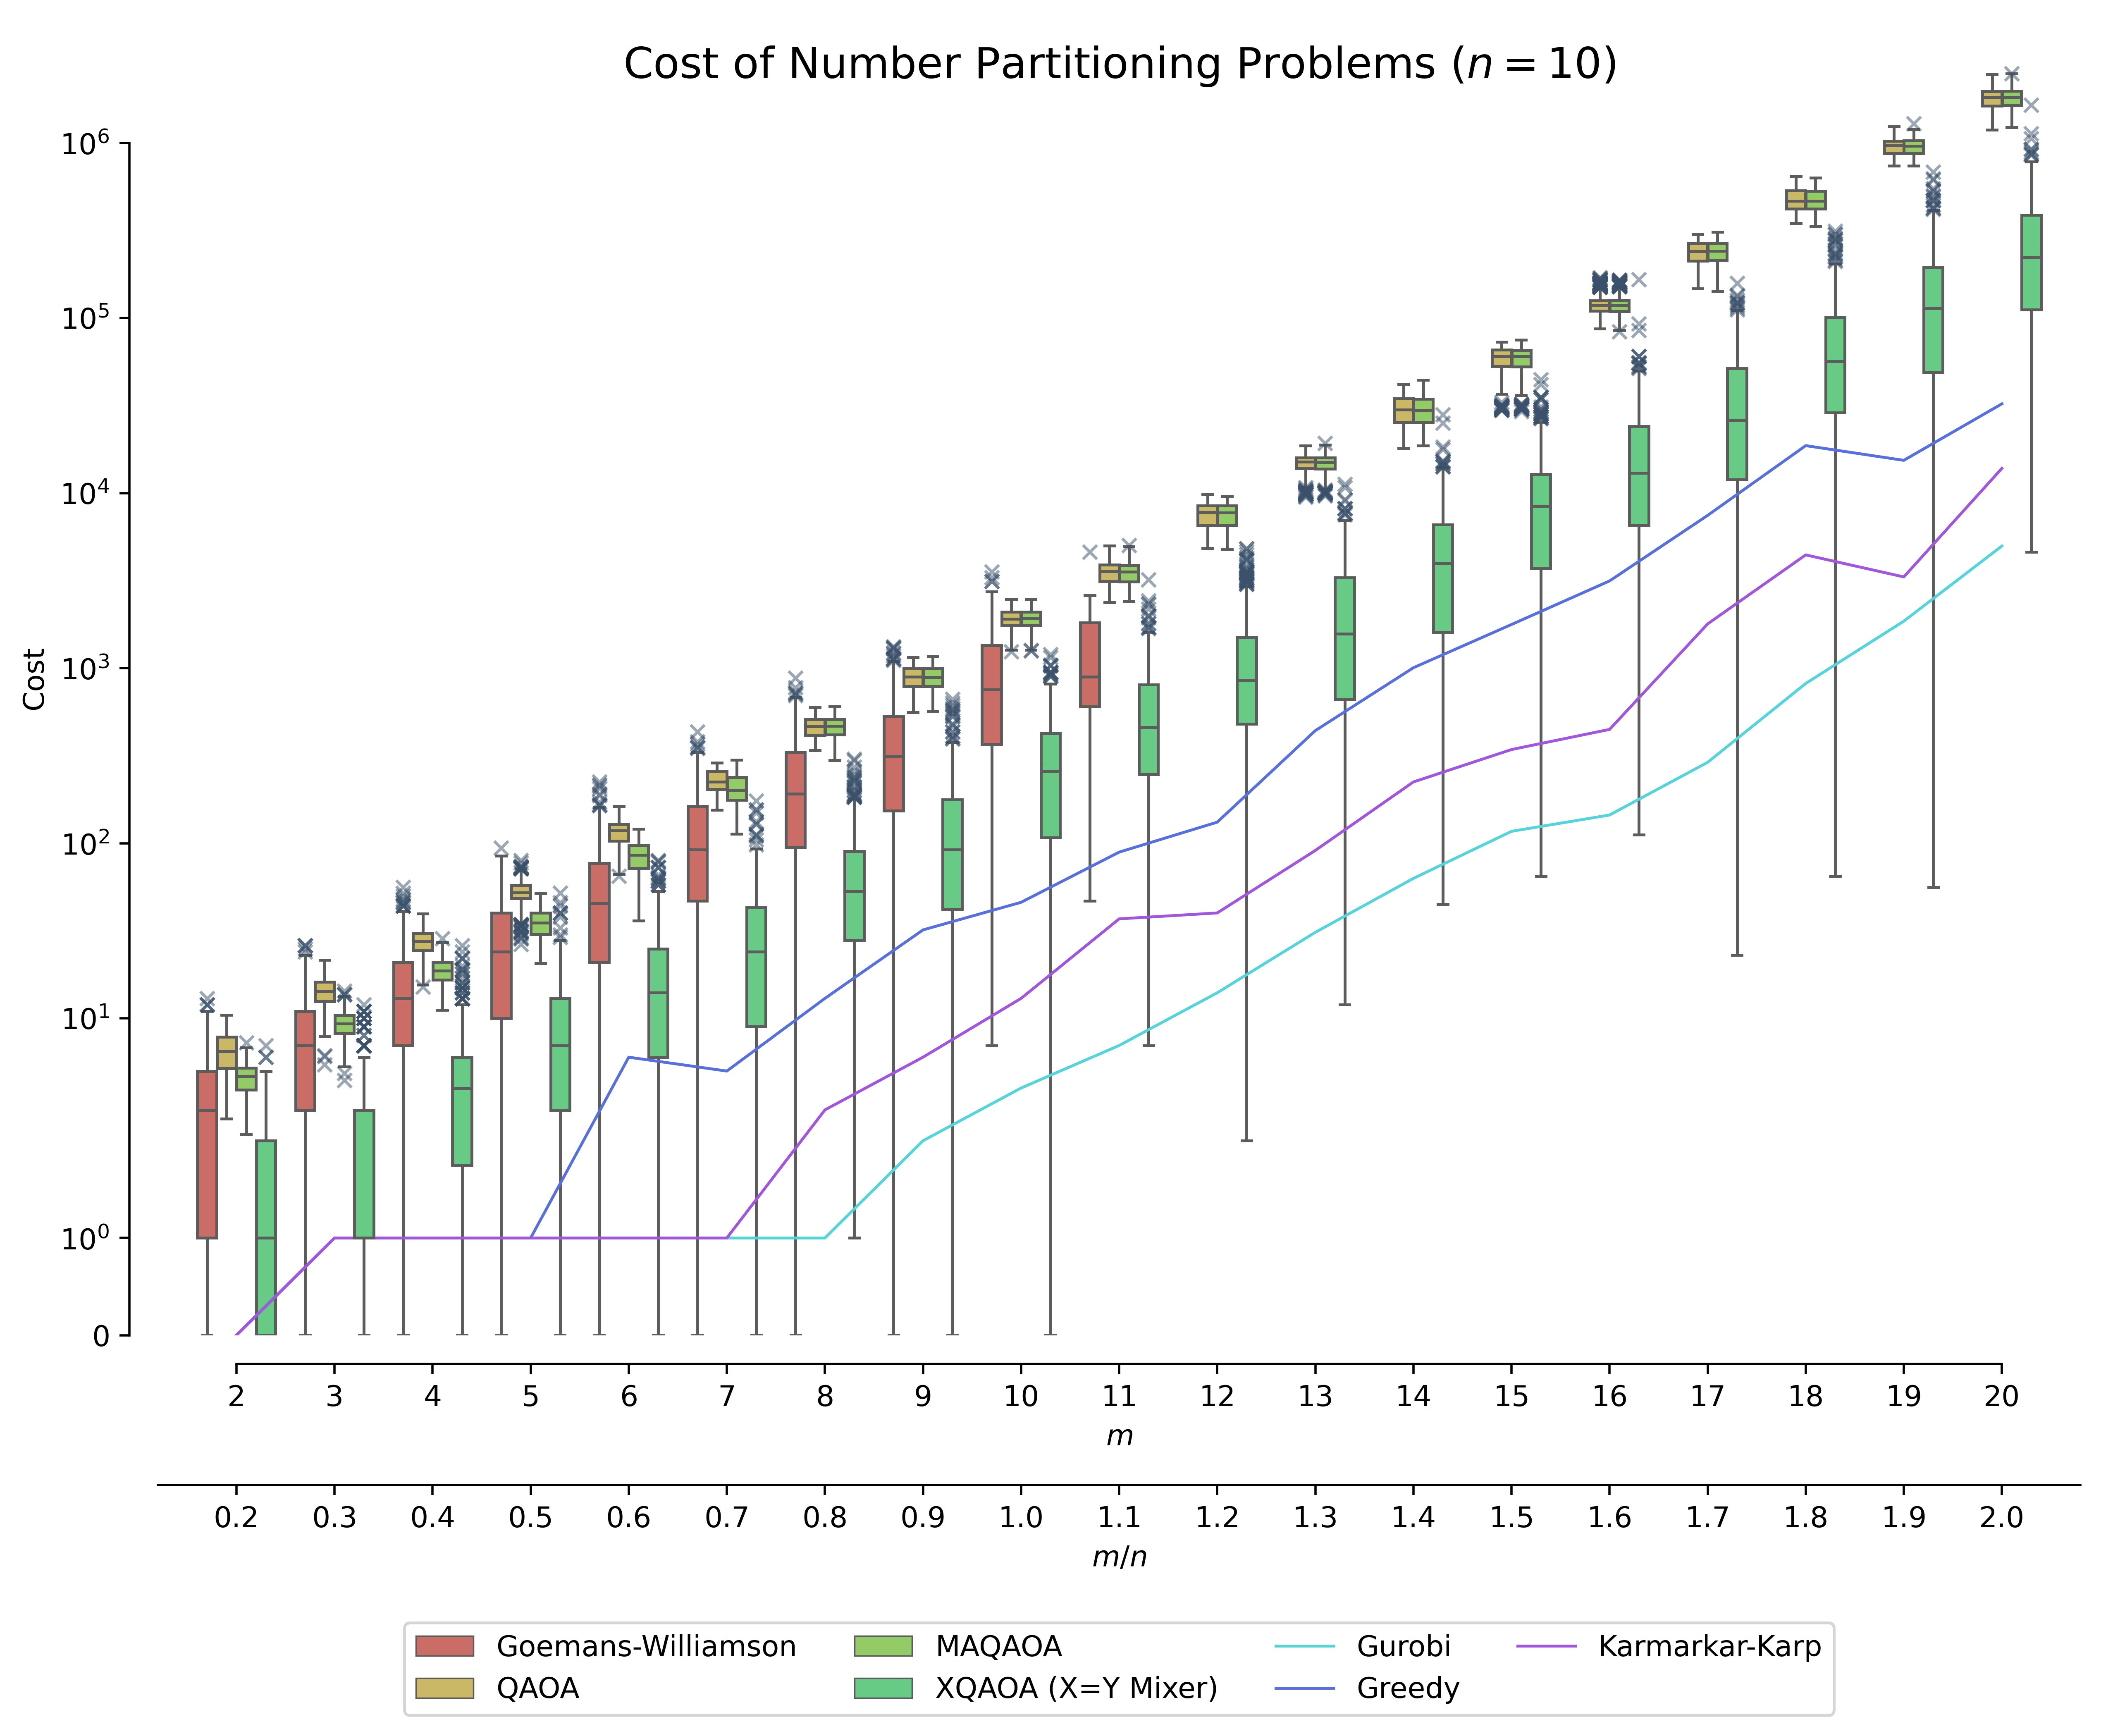

In [4]:
plot_data(path_n)

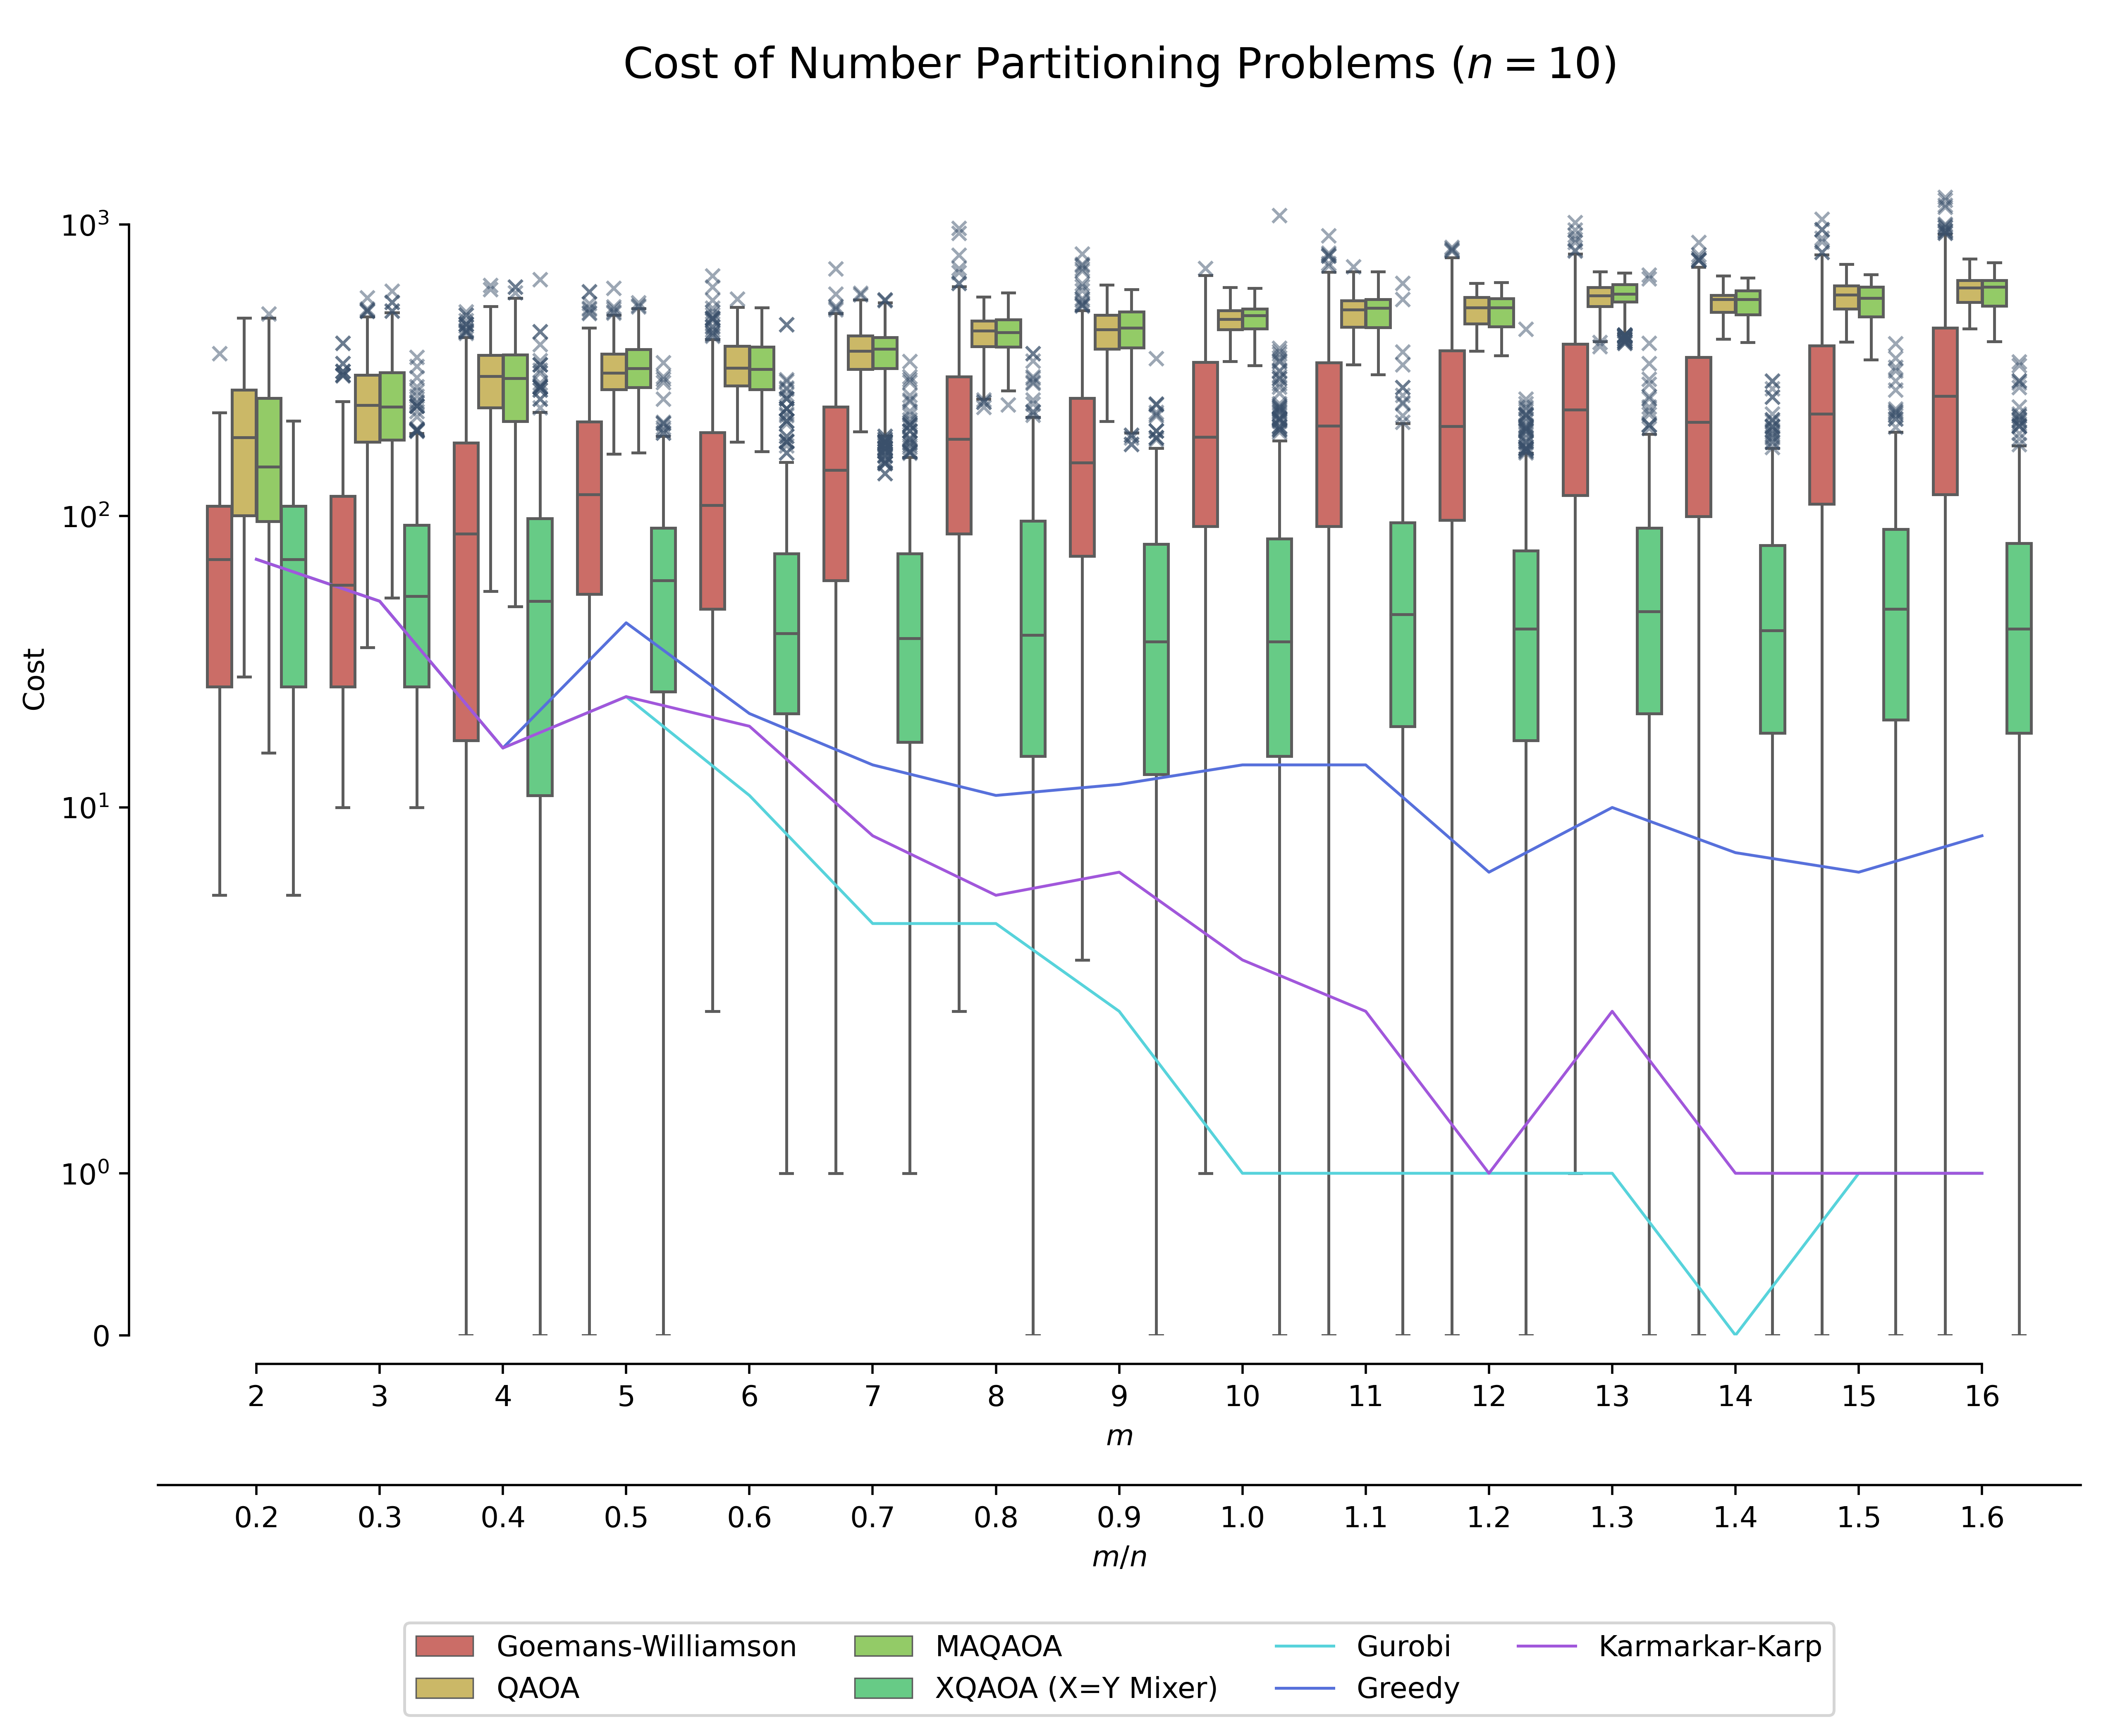

In [7]:
plot_data(path_m)

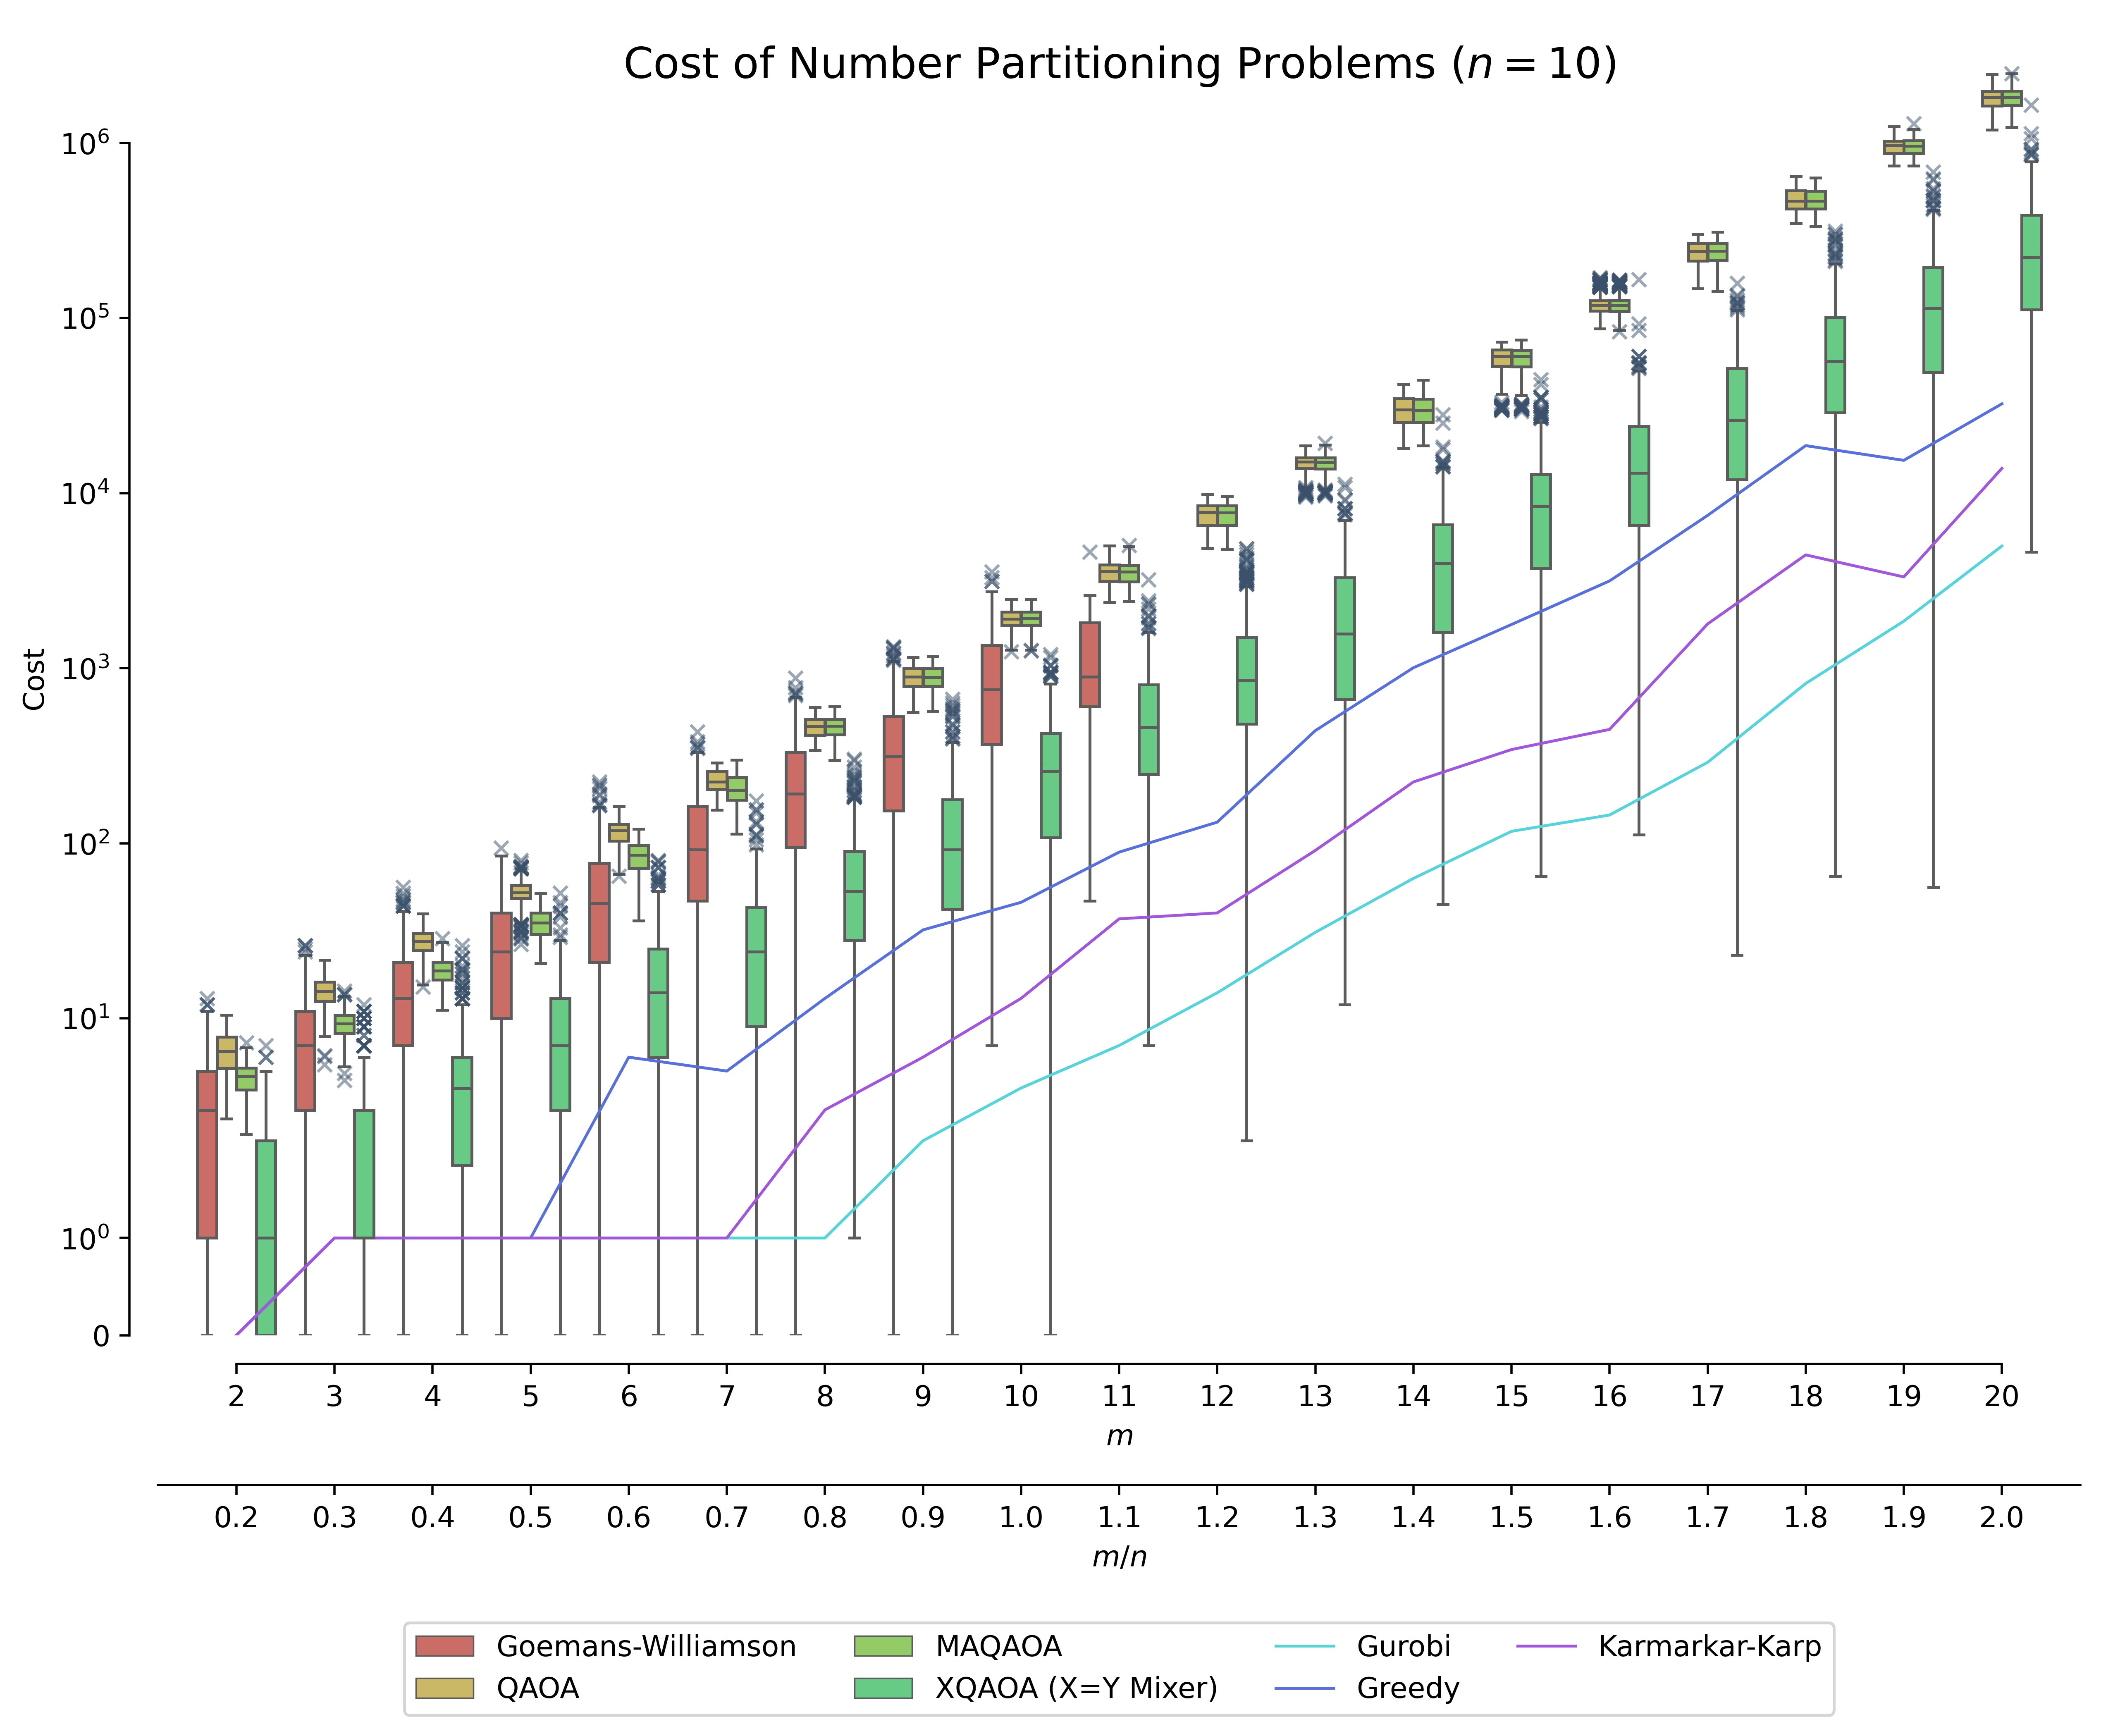

In [3]:
# fixed n
df_n = pd.read_csv(path_n)

alg = df_n['Algorithm']
boxplots = (alg == "Goemans-Williamson") | (alg == "QAOA") | (alg == "MAQAOA") | (alg == "XQAOA (X=Y Mixer)")
lineplots = (alg == "Gurobi") | (alg == "Greedy") | (alg == "Karmarkar-Karp") 

fig = plt.figure(figsize=(12,12), dpi=500)
ax1 = fig.add_subplot(111)

sns.boxplot(data=df_n, 
                 x=df_n['m'][boxplots], 
                 y='Cost', 
                 hue=df_n['Algorithm'][boxplots],
                 hue_order=hue_order_box, 
                 palette=palette_box,
                 flierprops=flierprops)

sns.lineplot(data=df_n,
                  x=df_n['m'][lineplots]-2,
                  y='Cost',
                  hue=df_n['Algorithm'][lineplots],
                  hue_order=hue_order_line,
                  ci=None,
                  palette=palette_line,
                  estimator=np.median)

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())

fig.subplots_adjust(bottom=0.35)
ax1.set_xlabel(r"$m$")
ax2.set_xlabel(r"$m/n$")
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.114))
# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_formatter(lambda x, pos: str((x+2)/10))

# title
plt.title(f'Cost of Number Partitioning Problems ($n=10$)', fontsize = 15, y=1.0, pad=-20)

# legend
sns.move_legend(ax1, "lower center",
    bbox_to_anchor=(.5,-0.3), ncol=4, title=None, frameon=True)

plt.yscale('symlog')
plt.ylabel('Cost',fontsize = 12)
ax1.set(ylim=(0,0.5*10**7))



sns.despine(ax=ax1,offset=10, trim=True)

#plt.savefig('../report/figures/fixed_n.png', bbox_inches='tight')

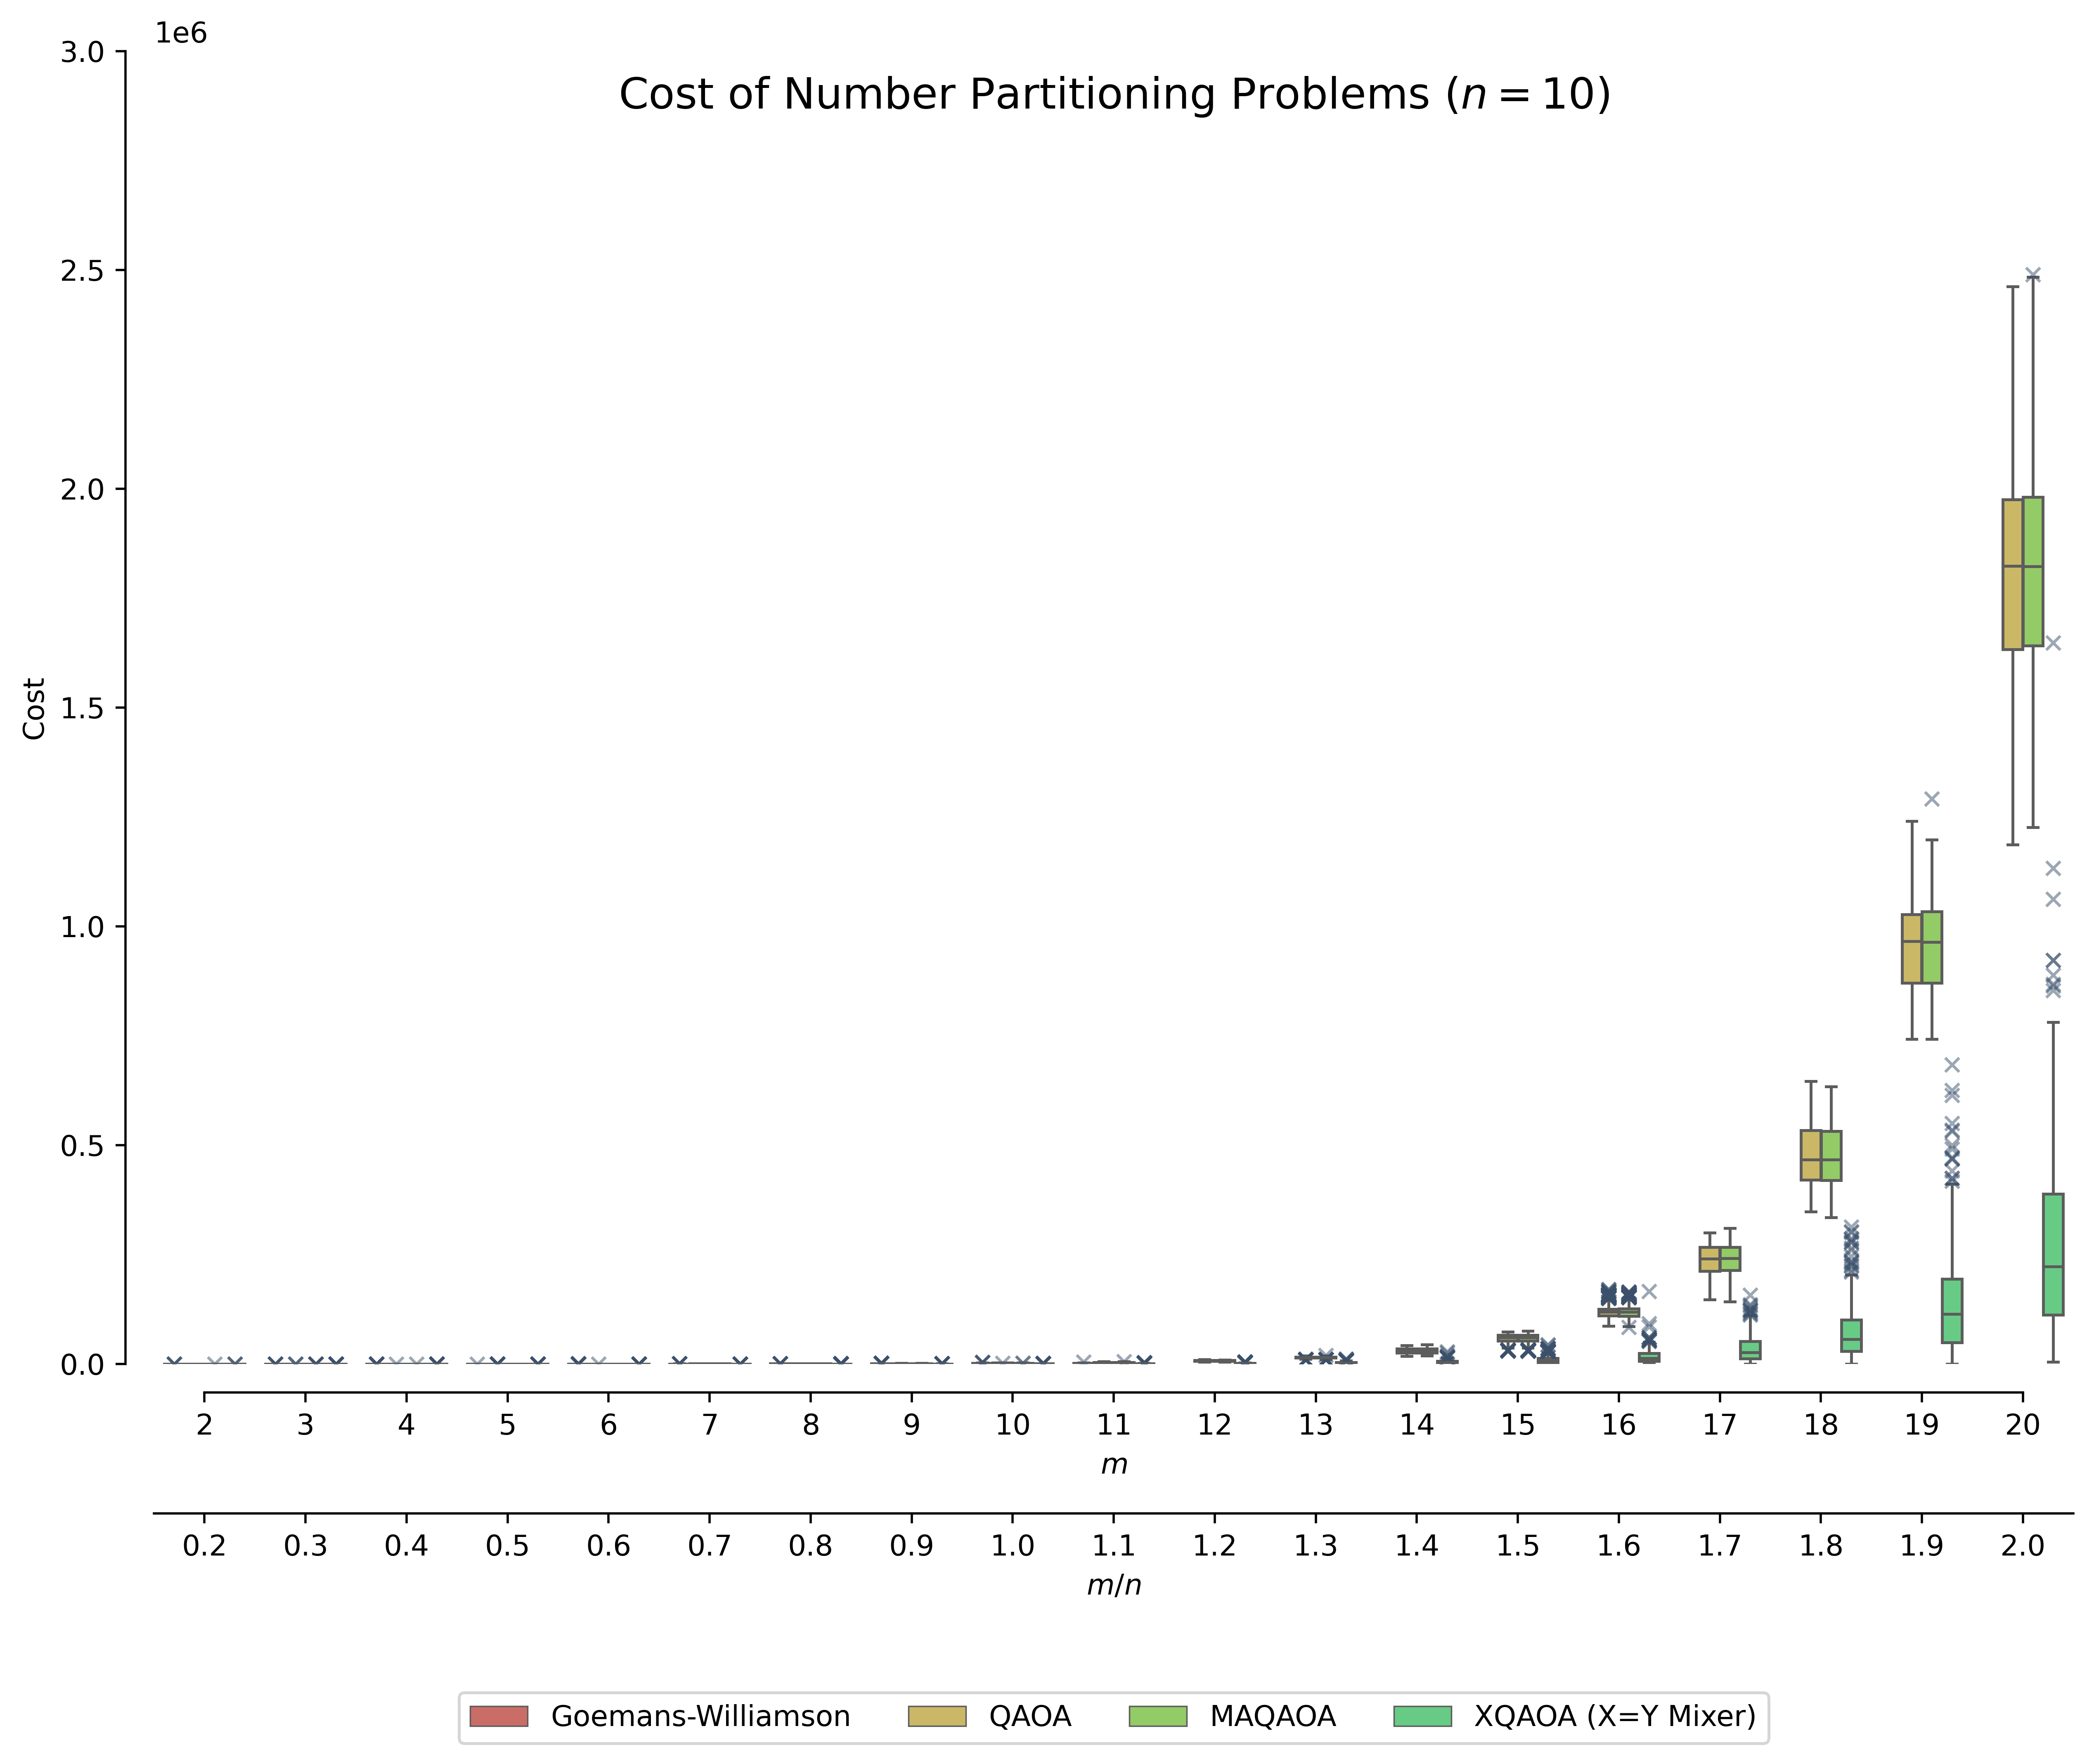

In [4]:
df_n = pd.read_csv(path_n)

alg = df_n['Algorithm']
boxplots = (alg == "Goemans-Williamson") | (alg == "QAOA") | (alg == "MAQAOA") | (alg == "XQAOA (X=Y Mixer)")
lineplots = (alg == "Gurobi") | (alg == "Greedy") | (alg == "Karmarkar-Karp") 

fig = plt.figure(figsize=(12,12), dpi=500)
ax1 = fig.add_subplot(111)

sns.boxplot(data=df_n, 
                 x=df_n['m'][boxplots], 
                 y='Cost', 
                 hue=df_n['Algorithm'][boxplots],
                 hue_order=hue_order_box, 
                 palette=palette_box,
                 flierprops=flierprops)

#sns.lineplot(data=df_n,
#                  x=df_n['m'][lineplots]-2,
#                  y='Cost',
#                  hue=df_n['Algorithm'][lineplots],
#                  hue_order=hue_order_line,
#                  palette=palette_line)
#
ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())

fig.subplots_adjust(bottom=0.35)
ax1.set_xlabel(r"$m$")
ax2.set_xlabel(r"$m/n$")
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.114))
# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_formatter(lambda x, pos: str((x+2)/10))

# title
plt.title(f'Cost of Number Partitioning Problems ($n=10$)', fontsize = 15, y=1.0, pad=-20)

# legend
sns.move_legend(ax1, "lower center",
    bbox_to_anchor=(.5,-0.3), ncol=4, title=None, frameon=True)

#plt.yscale('symlog')
plt.ylabel('Cost',fontsize = 12)
ax1.set(ylim=(0,0.3*10**7))



sns.despine(ax=ax1,offset=10, trim=True)

plt.savefig('../report/figures/fixed_n_normal.png', bbox_inches='tight')

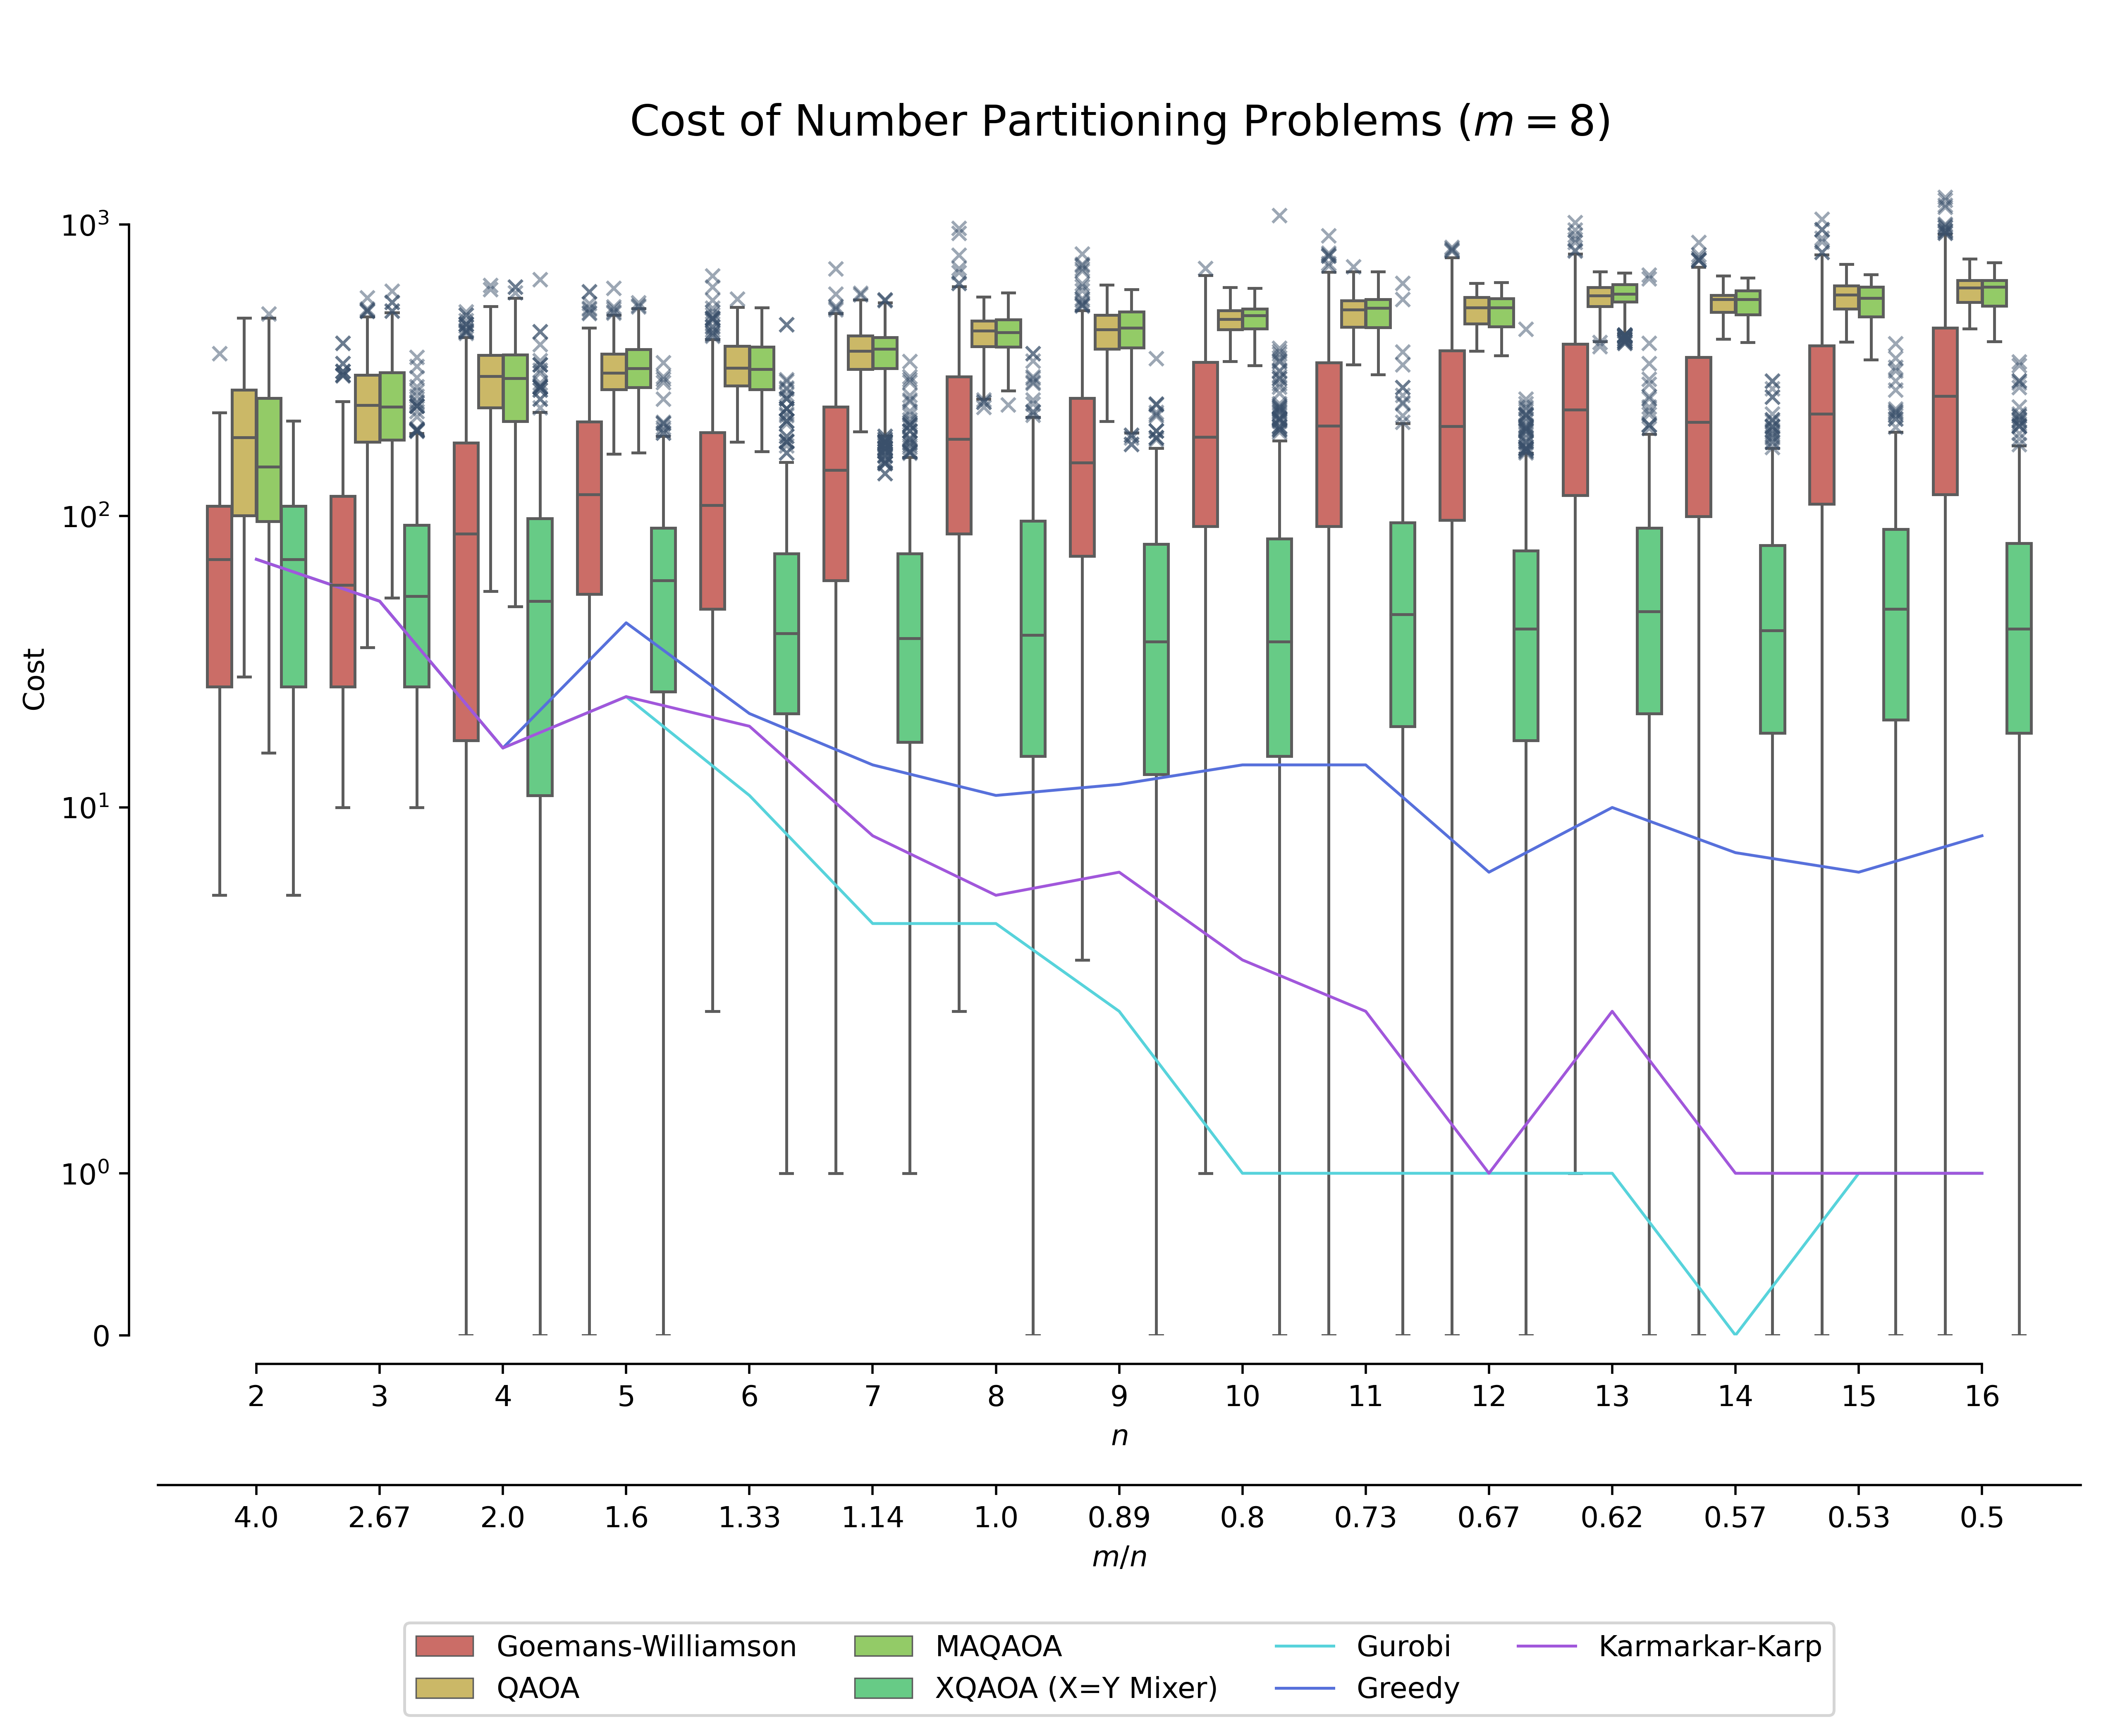

In [5]:
# fixed m

df_m = pd.read_csv(path_m)

fig = plt.figure(figsize=(12,12), dpi=500)
ax1 = fig.add_subplot(111)

alg = df_m['Algorithm']
boxplots = (alg == "Goemans-Williamson") | (alg == "QAOA") | (alg == "MAQAOA") | (alg == "XQAOA (X=Y Mixer)")
lineplots = (alg == "Gurobi") | (alg == "Greedy") | (alg == "Karmarkar-Karp")

sns.boxplot(data=df_m, 
                 x=df_m['n'][boxplots], 
                 y='Cost', 
                 hue=df_m['Algorithm'][boxplots],
                 hue_order=hue_order_box,
                 ax=ax1,
                 palette=palette_box,
                 flierprops=flierprops)

sns.lineplot(data=df_m,
                  x=df_m['n'][lineplots]-2,
                  y='Cost',
                  hue=df_m['Algorithm'][lineplots],
                  hue_order=hue_order_line,
                  ax=ax1,
                  ci=None,
                  palette=palette_line,
                  estimator=np.median)

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
fig.subplots_adjust(bottom=0.35)
ax1.set_xlabel(r"$n$")
ax2.set_xlabel(r"$m/n$")
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.114))
# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_formatter(lambda x, pos: str(round(8/(x+2),2)))

# title
plt.title(f'Cost of Number Partitioning Problems ($m=8$)', fontsize = 15, y=1.0, pad=-40)

# legend
sns.move_legend(ax1, "lower center",
    bbox_to_anchor=(.5,-0.3), ncol=4, title=None, frameon=True)

plt.ylabel('Cost',fontsize = 12)
plt.yscale('symlog')
ax1.set(ylim=(0,0.5*10**4))

sns.despine(ax=ax1,offset=10, trim=True)

plt.savefig('../report/figures/fixed_m.png', bbox_inches='tight')

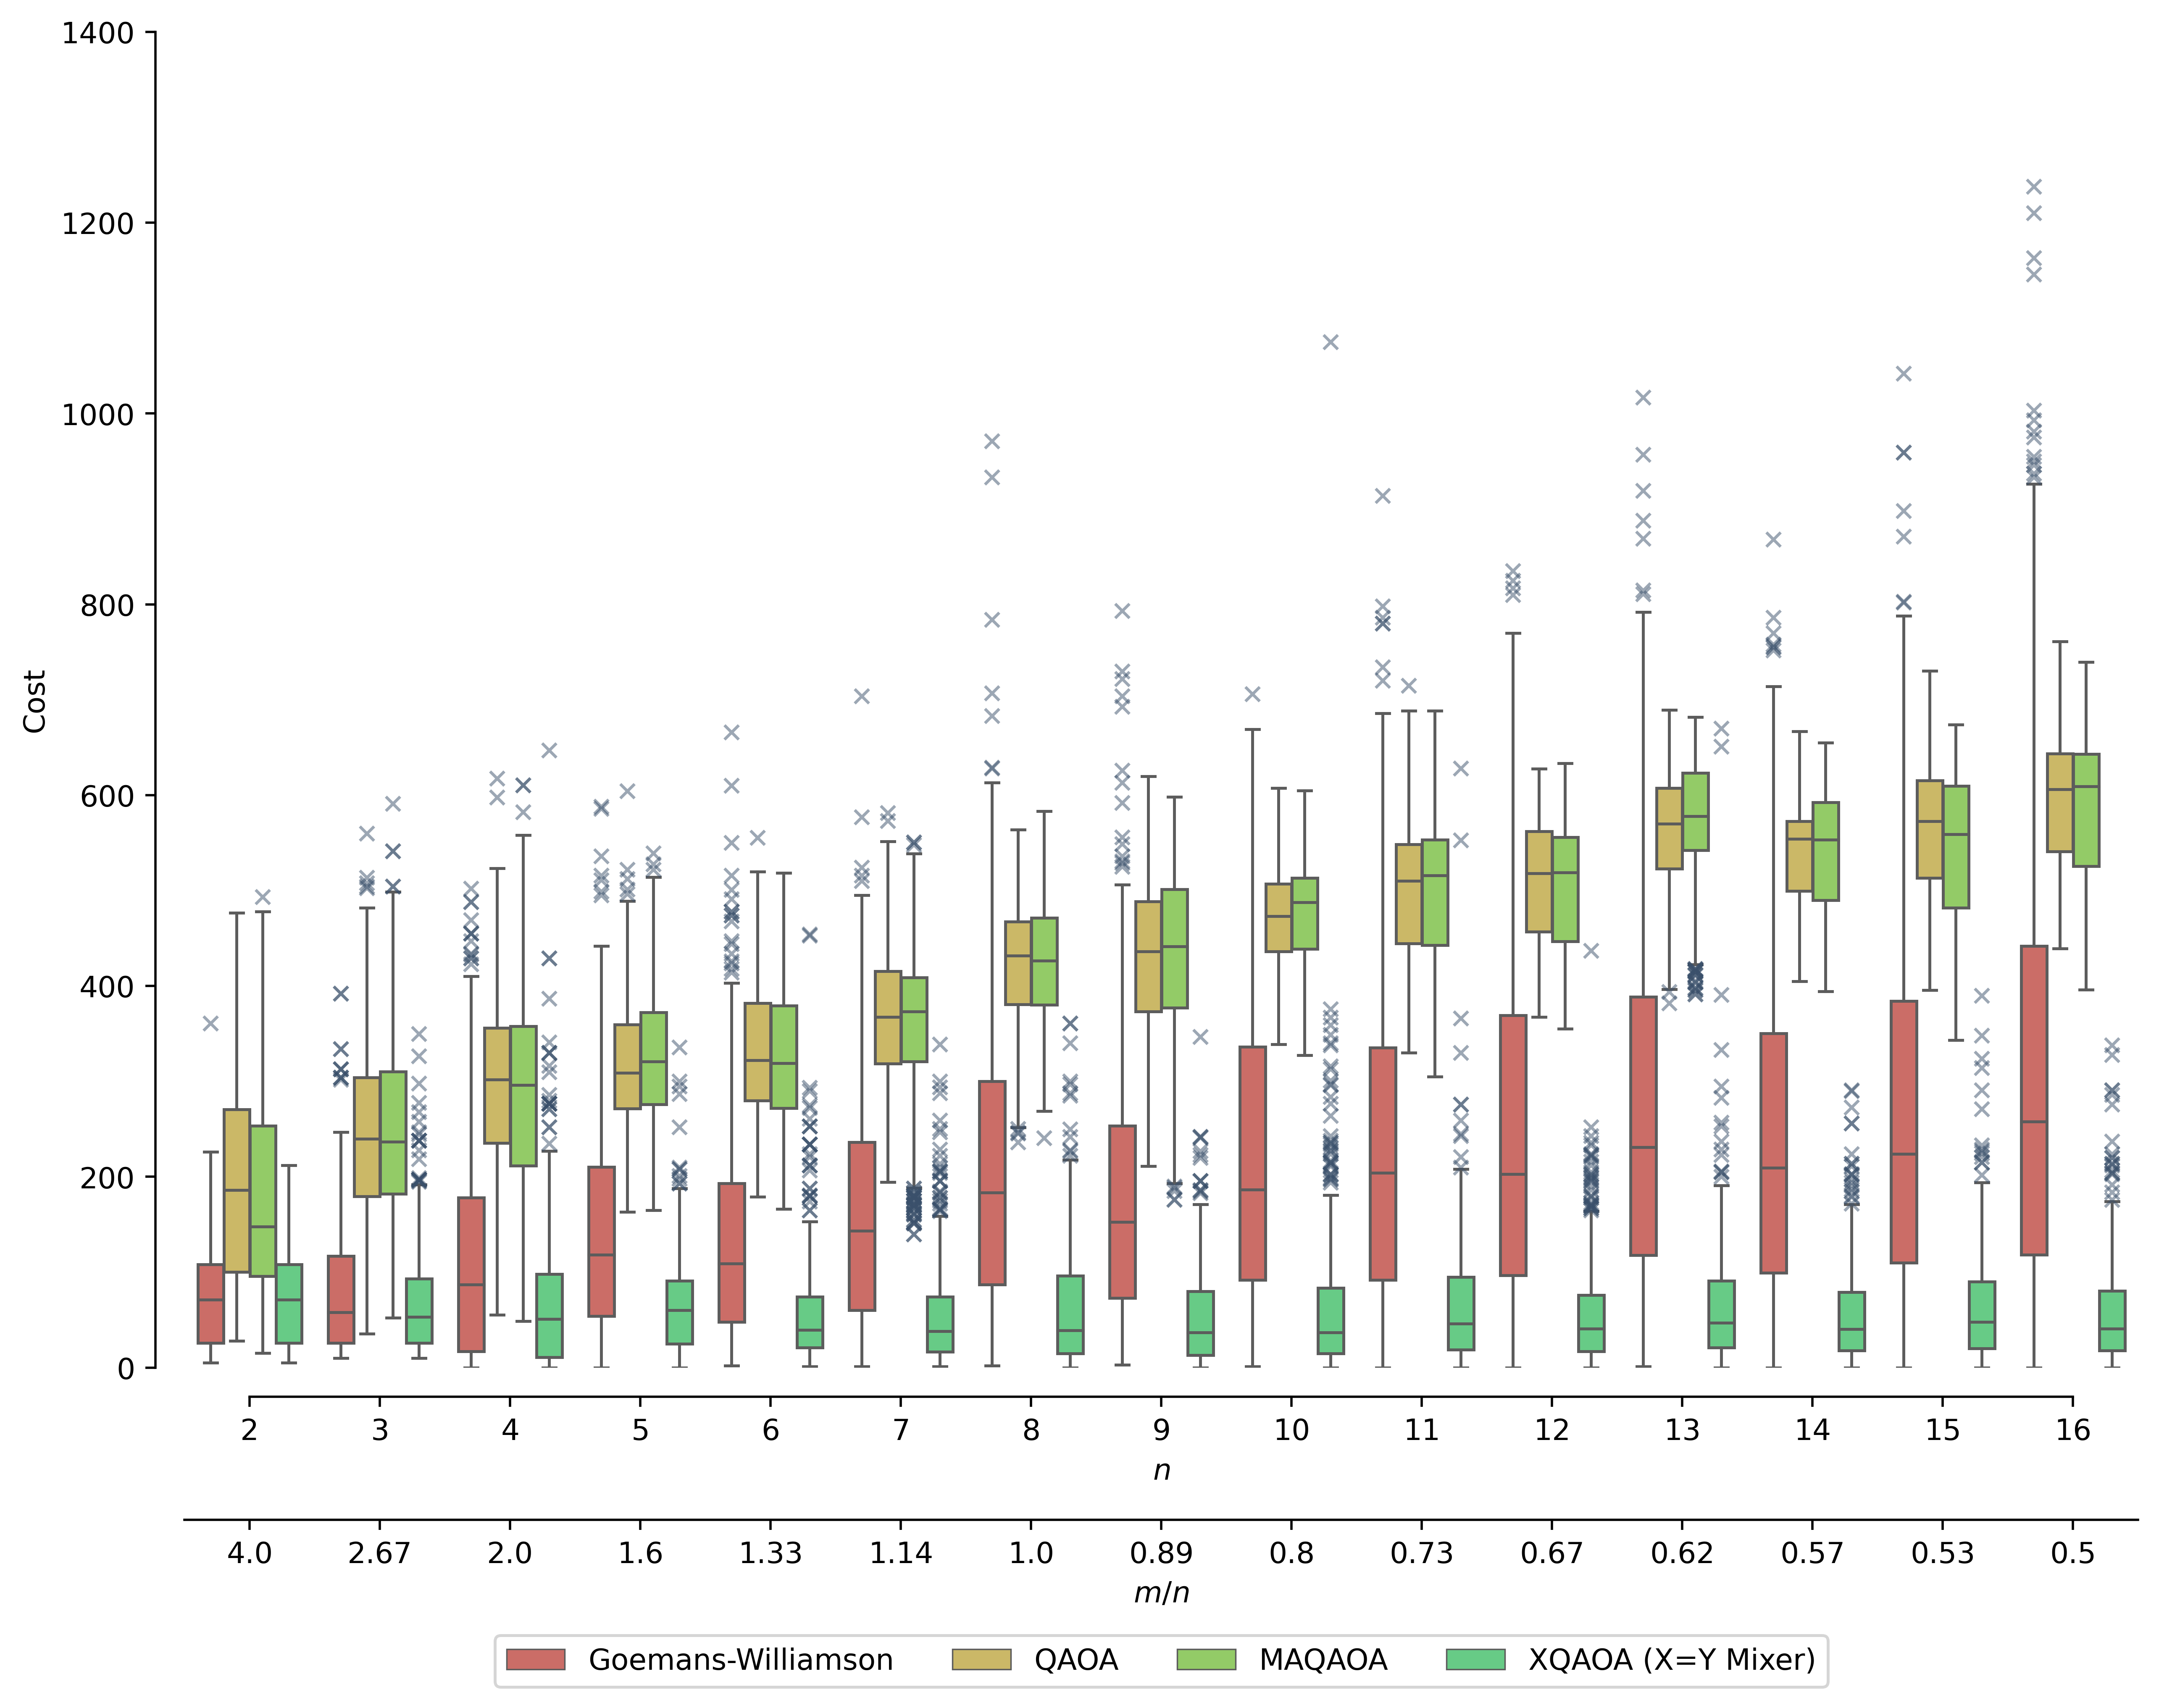

In [15]:

df_m = pd.read_csv(path_m)

fig = plt.figure(figsize=(12,12), dpi=500)
ax1 = fig.add_subplot(111)

alg = df_m['Algorithm']
boxplots = (alg == "Goemans-Williamson") | (alg == "QAOA") | (alg == "MAQAOA") | (alg == "XQAOA (X=Y Mixer)")
#lineplots = (alg == "Gurobi") | (alg == "Complete Greedy") | (alg == "Complete Karmarkar-Karp")

sns.boxplot(data=df_m, 
                 x=df_m['n'][boxplots], 
                 y='Cost', 
                 hue=df_m['Algorithm'][boxplots],
                 hue_order=hue_order_box,
                 ax=ax1,
                 palette=palette_box,
                 flierprops=flierprops)

#sns.lineplot(data=df_m,
#                  x=df_m['n'][lineplots]-2,
#                  y='Cost',
#                  hue=df_m['Algorithm'][lineplots],
#                  hue_order=hue_order_line,
#                  ax=ax1,
#                  palette=palette_line)#,
#                  #ci=None)  

ax2 = ax1.twiny()
ax2.set_xlim(ax1.get_xlim())
fig.subplots_adjust(bottom=0.35)
ax1.set_xlabel(r"$n$")
ax2.set_xlabel(r"$m/n$")
# Move twinned axis ticks and label from top to bottom
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
# Offset the twin axis below the host
ax2.spines["bottom"].set_position(("axes", -0.114))
# Turn on the frame for the twin axis, but then hide all 
# but the bottom spine
ax2.set_frame_on(True)
ax2.patch.set_visible(False)

for sp in ax2.spines.values():
    sp.set_visible(False)
ax2.spines["bottom"].set_visible(True)

ax2.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax2.xaxis.set_major_formatter(lambda x, pos: str(round(8/(x+2), 2)))

# title
#plt.title(f'Cost of Number Partitioning Problems ($m=8$)', fontsize = 15, y=1.0, pad=-40)

# legend
sns.move_legend(ax1, "lower center",
    bbox_to_anchor=(.5,-0.25), ncol=4, title=None, frameon=True)

plt.ylabel('Cost',fontsize = 12)
#plt.yscale('symlog')
ax1.set(ylim=(0,0.14*10**4))

sns.despine(ax=ax1,offset=10, trim=True)

plt.savefig('../report/figures/fixed_m_normal.png', bbox_inches='tight')


In [13]:
# make plots for fixed n, get m = 7
variants = pd.DataFrame()

problems = ["QAOA", "MAQAOA", "XQAOA (X=Y Mixer)"]

for problem in problems:
    condition = (df_n['Algorithm'] == problem) & (df_n['m'] == 7)
    x = df_n[condition].iloc[200:380,:]
    df = pd.concat([variants,x])     

col = []
for i in range(6,9):
    for j in range(20):
        col.append(f"N[7][%d]"%i)
col = col*3
df['Problem'] = col

# figure
fig = plt.figure(figsize=(9,6), dpi=500)
ax = fig.add_subplot(111)

prob = variants['Problem']
sns.boxplot(data=df, 
                 x=variants['Problem'], 
                 y='Cost', 
                 hue=variants['Algorithm'],
                 ax=ax,
                 palette=palette_box,
                 flierprops=flierprops)

# title
#plt.title(f'Cost of QAOA and Variant on Sample Data from  ($m=8$)', fontsize = 15, y=1.0, pad=-40)

# legend
sns.move_legend(ax, "lower center",
    bbox_to_anchor=(.5,-0.2), ncol=4, title=None, frameon=True)

plt.ylabel('Cost',fontsize = 12)
#plt.yscale('symlog')
ax1.set(ylim=(0,0.14*10**4))

sns.despine(ax=ax,offset=10, trim=True)

plt.savefig('../report/figures/variants.png', bbox_inches='tight')

ValueError: Length of values (180) does not match length of index (480)

In [159]:
col

['N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][6]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][7]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][8]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][9]',
 'N[7][10]',
 'N[7][10]',
 'N[7][10]',
 